# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Import necessary libraries
import requests
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Fetch response
        response = requests.get(city_url)

        # Check for successful status
        if response.status_code == 200:
            city_weather = response.json()

            # Parse out required weather data
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print(f"City {city} not found. Status Code: {response.status_code}")

    # Handle exceptions
    except Exception as e:
        print(f"City not found. Skipping... ({e})")

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | acapulco de juarez
Processing Record 7 of Set 1 | hobyo
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | ola
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | hadibu
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | puerto baquerizo moreno
Processing Record 16 of Set 1 | mokhsogollokh
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | gadzhiyevo
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | anavyssos
Processing Record 22 of Set 1 

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [44]:
# Display sample data
print(city_data_df.head())  # Display the first 5 rows
print(city_data_df.columns)  # Display the column names

                          City      Lat       Lng  Max Temp  Humidity  \
0                 invercargill -46.4000  168.3500     12.79        63   
1                      college  64.8569 -147.8028    -21.03        77   
2                      talnakh  69.4865   88.3972     -8.56        96   
3                     thompson  55.7435  -97.8558      0.09        93   
4  edinburgh of the seven seas -37.0676  -12.3116     14.14        74   

   Cloudiness  Wind Speed Country        Date  
0         100        1.79      NZ  1731958536  
1          75        0.00      US  1731958538  
2         100        0.94      RU  1731958539  
3         100        1.03      CA  1731958540  
4          12        8.43      SH  1731958541  
Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,12.79,63,100,1.79,NZ,1731958536
1,college,64.8569,-147.8028,-21.03,77,75,0.00,US,1731958538
2,talnakh,69.4865,88.3972,-8.56,96,100,0.94,RU,1731958539
3,thompson,55.7435,-97.8558,0.09,93,100,1.03,CA,1731958540
4,edinburgh of the seven seas,-37.0676,-12.3116,14.14,74,12,8.43,SH,1731958541


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

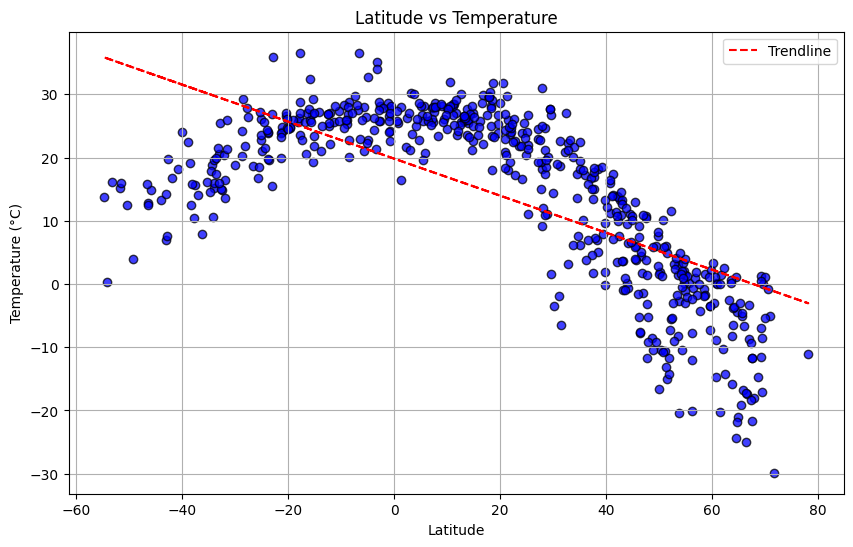

In [47]:
# Build scatter plot for latitude vs. temperature
df = pd.DataFrame(city_data)

def scatter_plot(x, y, title, xlabel, ylabel, save_path=None):
    plt.figure(figsize=(10, 6)) 
    plt.scatter(x, y, edgecolor='black', alpha=0.75, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    # Added a trendline
    z = np.polyfit(x, y, 1)  # Linear fit
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", label="Trendline")  # Added red dashed line
    plt.legend()

 
    if save_path:
        plt.savefig(save_path)

    plt.show()

scatter_plot(
    x=df['Lat'], 
    y=df['Max Temp'], 
    title='Latitude vs Temperature', 
    xlabel='Latitude', 
    ylabel='Temperature (°C)', 
    save_path="output_data/Fig1.png"
)

#### Latitude Vs. Humidity

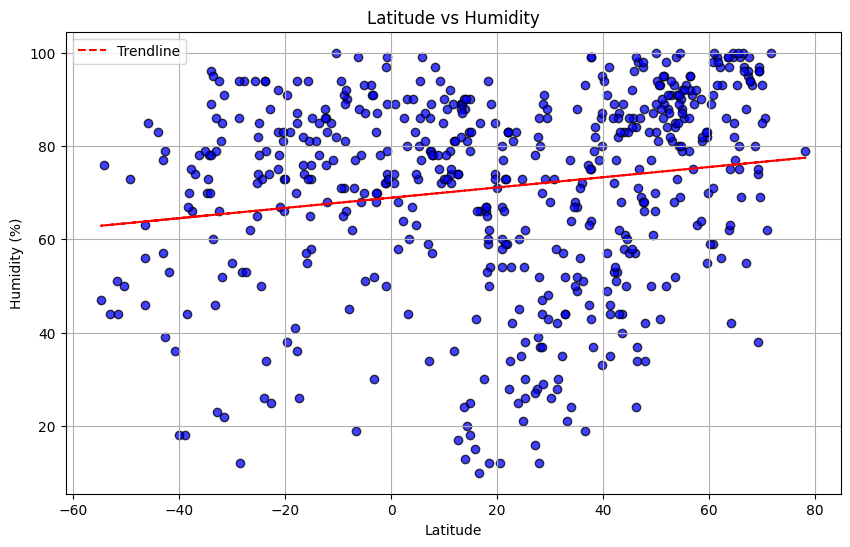

In [48]:
# Build the scatter plots for latitude vs. humidity
df = pd.DataFrame(city_data)

def scatter_plot(x, y, title, xlabel, ylabel, save_path=None):
    plt.figure(figsize=(10, 6)) 
    plt.scatter(x, y, edgecolor='black', alpha=0.75, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    # Added a trendline
    z = np.polyfit(x, y, 1)  # Linear fit
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", label="Trendline")  # Added red dashed line
    plt.legend()

 
    if save_path:
        plt.savefig(save_path)

    plt.show()

scatter_plot(
    x=df['Lat'], 
    y=df['Humidity'],
    title='Latitude vs Humidity', 
    xlabel='Latitude', 
    ylabel='Humidity (%)', 
    save_path="output_data/Fig2.png"
)

#### Latitude Vs. Cloudiness

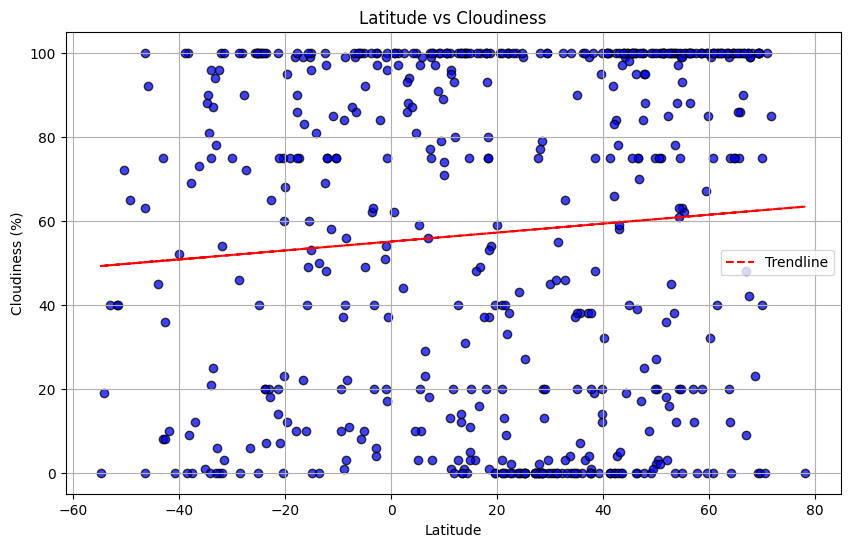

In [49]:
# Build the scatter plots for latitude vs. cloudiness
df = pd.DataFrame(city_data)

def scatter_plot(x, y, title, xlabel, ylabel, save_path=None):
    plt.figure(figsize=(10, 6)) 
    plt.scatter(x, y, edgecolor='black', alpha=0.75, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    # Added a trendline
    z = np.polyfit(x, y, 1)  # Linear fit
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", label="Trendline")  # Added red dashed line
    plt.legend()

 
    if save_path:
        plt.savefig(save_path)

    plt.show()

scatter_plot(
    x=df['Lat'], 
    y=df['Cloudiness'], 
    title='Latitude vs Cloudiness', 
    xlabel='Latitude', 
    ylabel='Cloudiness (%)', 
    save_path="output_data/Fig3.png"
)

#### Latitude vs. Wind Speed Plot

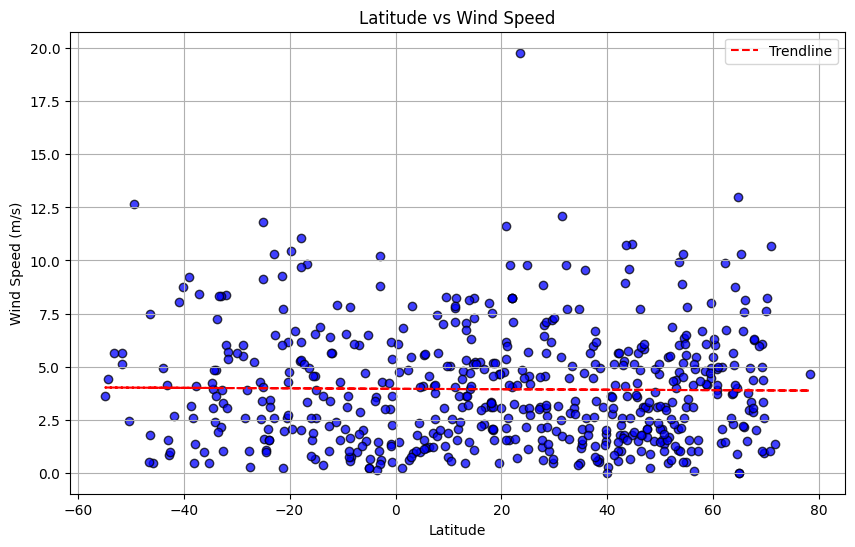

In [50]:
# Build the scatter plots for latitude vs. wind speed
df = pd.DataFrame(city_data)

def scatter_plot(x, y, title, xlabel, ylabel, save_path=None):
    plt.figure(figsize=(10, 6)) 
    plt.scatter(x, y, edgecolor='black', alpha=0.75, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    # Added a trendline
    z = np.polyfit(x, y, 1)  # Linear fit
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", label="Trendline")  # Added red dashed line
    plt.legend()

 
    if save_path:
        plt.savefig(save_path)

    plt.show()

scatter_plot(
    x=df['Lat'], 
    y=df['Wind Speed'],  # Update to Wind Speed column
    title='Latitude vs Wind Speed', 
    xlabel='Latitude', 
    ylabel='Wind Speed (m/s)', 
    save_path="output_data/Fig4.png"
)

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, title, xlabel, ylabel, save_path=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate regression line values
    regression_line = slope * x + intercept

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, edgecolor='black', alpha=0.75, label='Data Points')
    plt.plot(x, regression_line, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}")
    
    # Add labels, title, and legend
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)

    # Save plot if save_path is provided
    if save_path:
        plt.savefig(save_path)

    # Show the plot
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df[df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,college,64.8569,-147.8028,-21.03,77,75,0.00,US,1731958538
2,talnakh,69.4865,88.3972,-8.56,96,100,0.94,RU,1731958539
3,thompson,55.7435,-97.8558,0.09,93,100,1.03,CA,1731958540
5,acapulco de juarez,16.8634,-99.8901,29.90,66,100,3.09,MX,1731958542
6,hobyo,5.3505,48.5268,26.80,80,59,5.57,SO,1731958543


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df[df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,12.79,63,100,1.79,NZ,1731958536
4,edinburgh of the seven seas,-37.0676,-12.3116,14.14,74,12,8.43,SH,1731958541
7,waitangi,-43.9535,-176.5597,13.23,83,45,4.92,NZ,1731958544
8,blackmans bay,-43.0167,147.3167,6.96,77,8,1.54,AU,1731958546
11,port-aux-francais,-49.3500,70.2167,3.97,73,65,12.66,TF,1731958549


###  Temperature vs. Latitude Linear Regression Plot

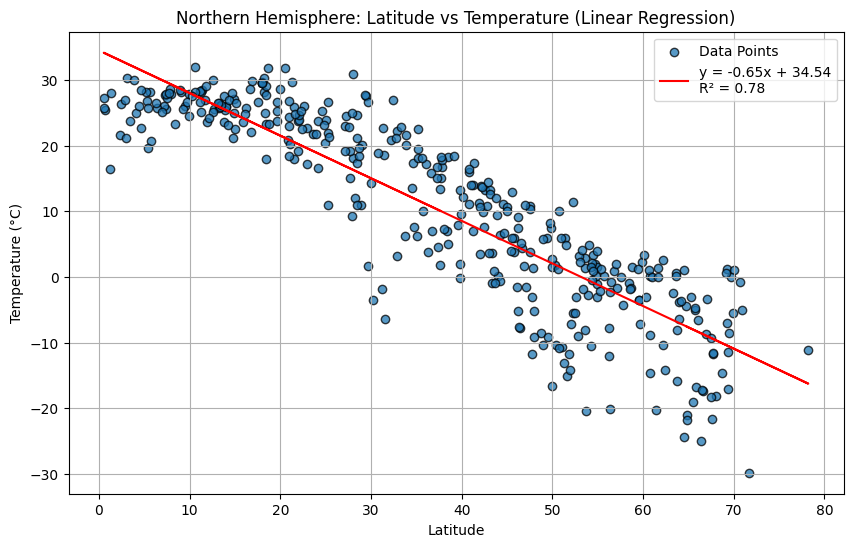

In [54]:
# Linear regression on Northern Hemisphere
linear_regression_plot(
    x=northern_hemi_df['Lat'], 
    y=northern_hemi_df['Max Temp'], 
    title='Northern Hemisphere: Latitude vs Temperature (Linear Regression)', 
    xlabel='Latitude', 
    ylabel='Temperature (°C)', 
    save_path="output_data/NH_Lat_vs_Temp.png"
)

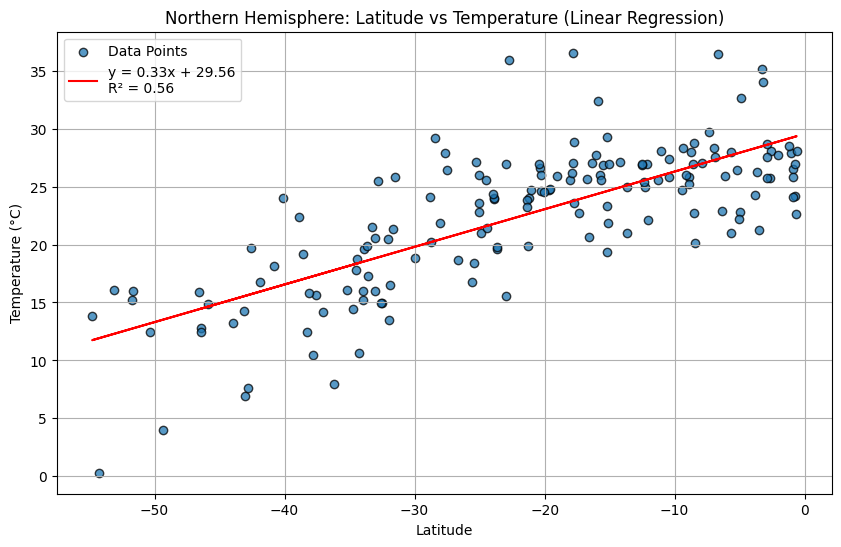

In [55]:
# Linear regression on Southern Hemisphere
linear_regression_plot(
    x=southern_hemi_df['Lat'], 
    y=southern_hemi_df['Max Temp'], 
    title='Northern Hemisphere: Latitude vs Temperature (Linear Regression)', 
    xlabel='Latitude', 
    ylabel='Temperature (°C)', 
    save_path="output_data/SH_Lat_vs_Temp.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

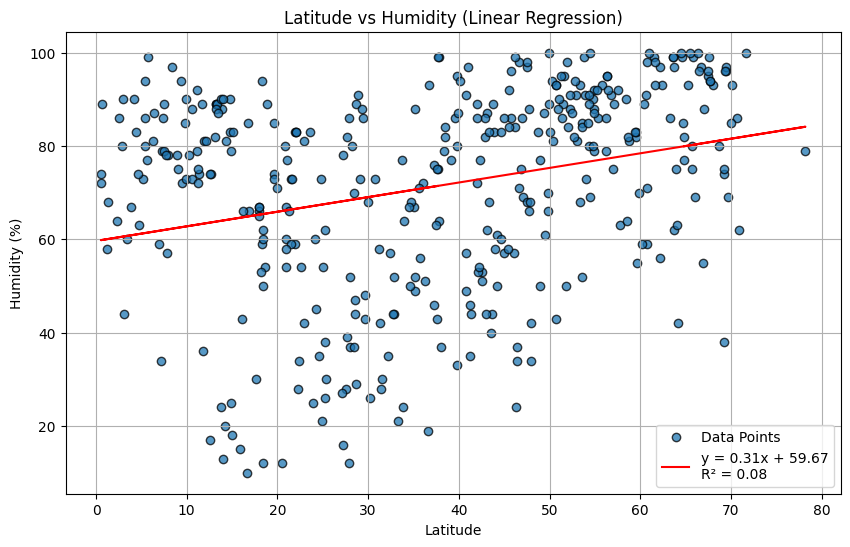

In [56]:
# Northern Hemisphere
linear_regression_plot(
    x=northern_hemi_df['Lat'], 
    y=northern_hemi_df['Humidity'], 
    title='Latitude vs Humidity (Linear Regression)', 
    xlabel='Latitude', 
    ylabel='Humidity (%)', 
    save_path="output_data/NH_Lat_vs_Humidity.png"
)

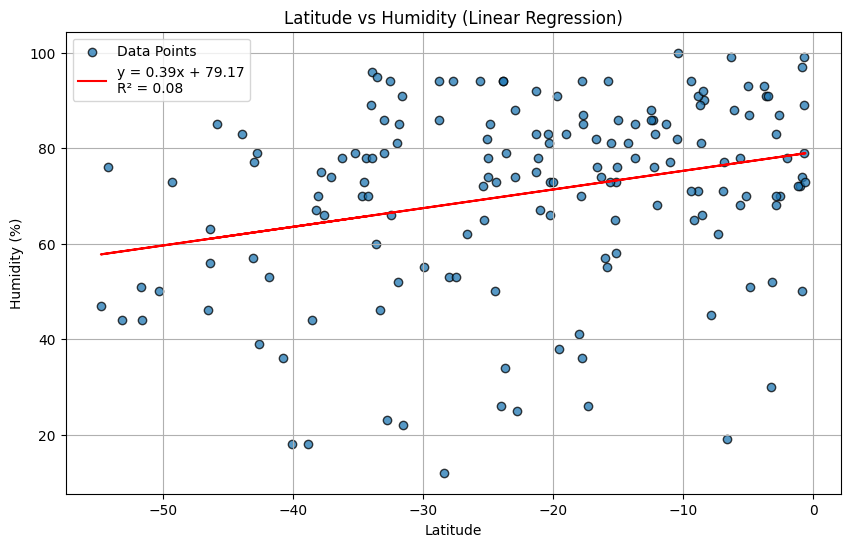

In [57]:
# Southern Hemisphere
linear_regression_plot(
    x=southern_hemi_df['Lat'], 
    y=southern_hemi_df['Humidity'], 
    title='Latitude vs Humidity (Linear Regression)', 
    xlabel='Latitude', 
    ylabel='Humidity (%)', 
    save_path="output_data/SH_Lat_vs_Humidity.png"
)

**Discussion about the linear relationship:** For both hemispheres, the closer to the equator, the more humidity.

### Cloudiness vs. Latitude Linear Regression Plot

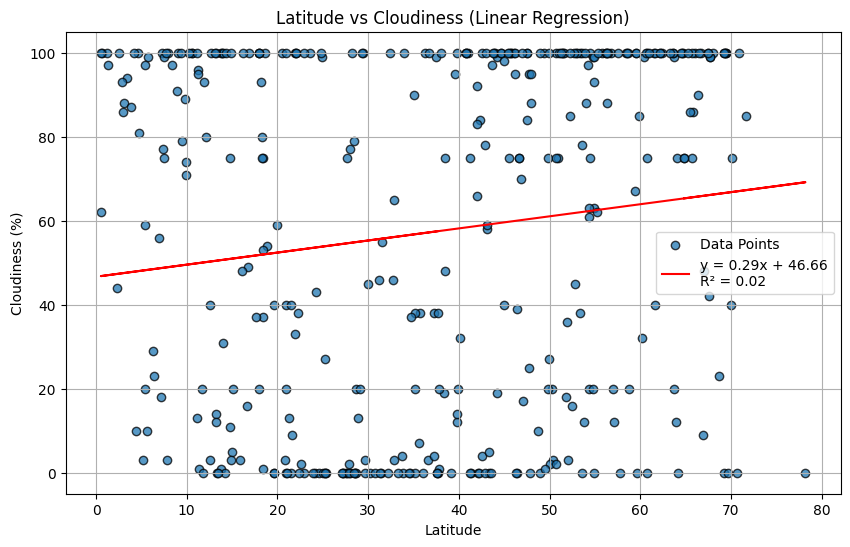

In [58]:
# Northern Hemisphere
linear_regression_plot(
    x=northern_hemi_df['Lat'], 
    y=northern_hemi_df['Cloudiness'], 
    title='Latitude vs Cloudiness (Linear Regression)', 
    xlabel='Latitude', 
    ylabel='Cloudiness (%)', 
    save_path="output_data/NH_Lat_vs_Cloudiness.png"
)

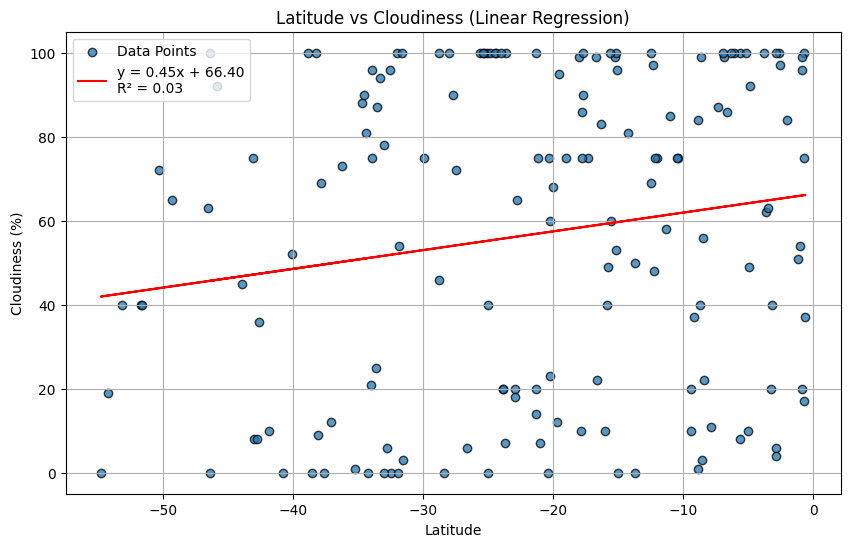

In [59]:
# Southern Hemisphere
linear_regression_plot(
    x=southern_hemi_df['Lat'], 
    y=southern_hemi_df['Cloudiness'], 
    title='Latitude vs Cloudiness (Linear Regression)', 
    xlabel='Latitude', 
    ylabel='Cloudiness (%)', 
    save_path="output_data/SH_Lat_vs_Cloudiness.png"
)

**Discussion about the linear relationship:** For both hemispheres, the closer to the equator, the more clouds tend to accumulate.

### Wind Speed vs. Latitude Linear Regression Plot

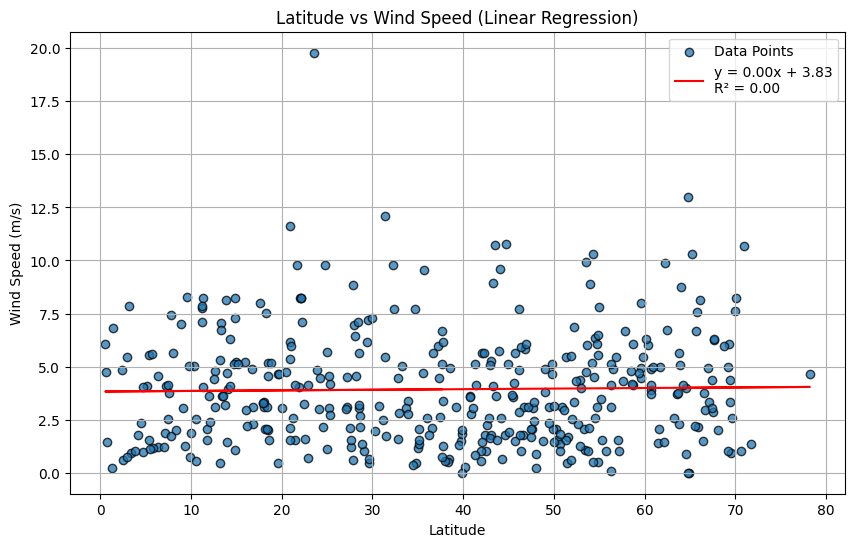

In [60]:
# Northern Hemisphere
linear_regression_plot(
    x=northern_hemi_df['Lat'], 
    y=northern_hemi_df['Wind Speed'], 
    title='Latitude vs Wind Speed (Linear Regression)', 
    xlabel='Latitude', 
    ylabel='Wind Speed (m/s)', 
    save_path="output_data/NH_Lat_vs_WindSpeed.png"
)

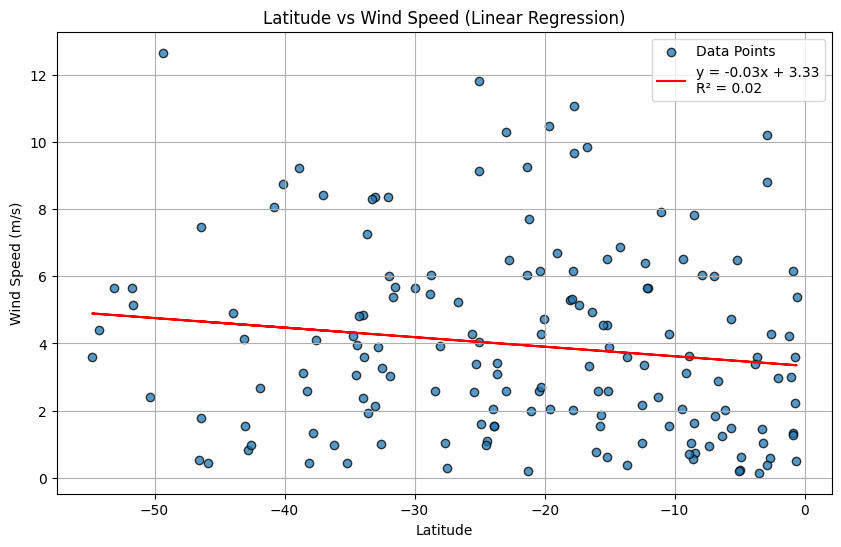

In [61]:
# Southern Hemisphere
linear_regression_plot(
    x=southern_hemi_df['Lat'], 
    y=southern_hemi_df['Wind Speed'], 
    title='Latitude vs Wind Speed (Linear Regression)', 
    xlabel='Latitude', 
    ylabel='Wind Speed (m/s)', 
    save_path="output_data/SH_Lat_vs_WindSpeed.png"
)

**Discussion about the linear relationship:** It is clear that the wind speed slows down as it gets closer to the equator - this applies to both hemispheres.